In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import streamlit as st

init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv(r"D:\University\Gradution Project\voice.csv")  # reading the file as a csv

In [3]:
df.sample(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2527,0.210410,0.031812,0.208315,0.193917,0.227002,0.033085,2.677560,10.777865,0.848660,0.180822,...,0.210410,0.169831,0.049587,0.268156,1.501399,0.023438,9.750000,9.726562,0.126934,female
2752,0.196909,0.041960,0.193667,0.174611,0.223222,0.048611,1.820306,6.072823,0.887230,0.329733,...,0.196909,0.173130,0.049793,0.275862,1.056152,0.023438,9.328125,9.304688,0.085408,female
1472,0.124013,0.080019,0.111044,0.053132,0.200635,0.147503,1.364891,5.248514,0.971955,0.778156,...,0.124013,0.108312,0.017112,0.271186,0.542969,0.007812,6.023438,6.015625,0.143008,male
2151,0.188019,0.027563,0.186172,0.175371,0.200575,0.025204,3.011602,12.944299,0.823300,0.174406,...,0.188019,0.168344,0.017167,0.238806,0.300322,0.164062,3.554688,3.390625,0.068077,female
2225,0.200232,0.065372,0.217306,0.171613,0.251841,0.080228,2.224034,9.340376,0.922504,0.527152,...,0.200232,0.163741,0.047714,0.272727,0.976974,0.023438,8.156250,8.132812,0.082832,female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

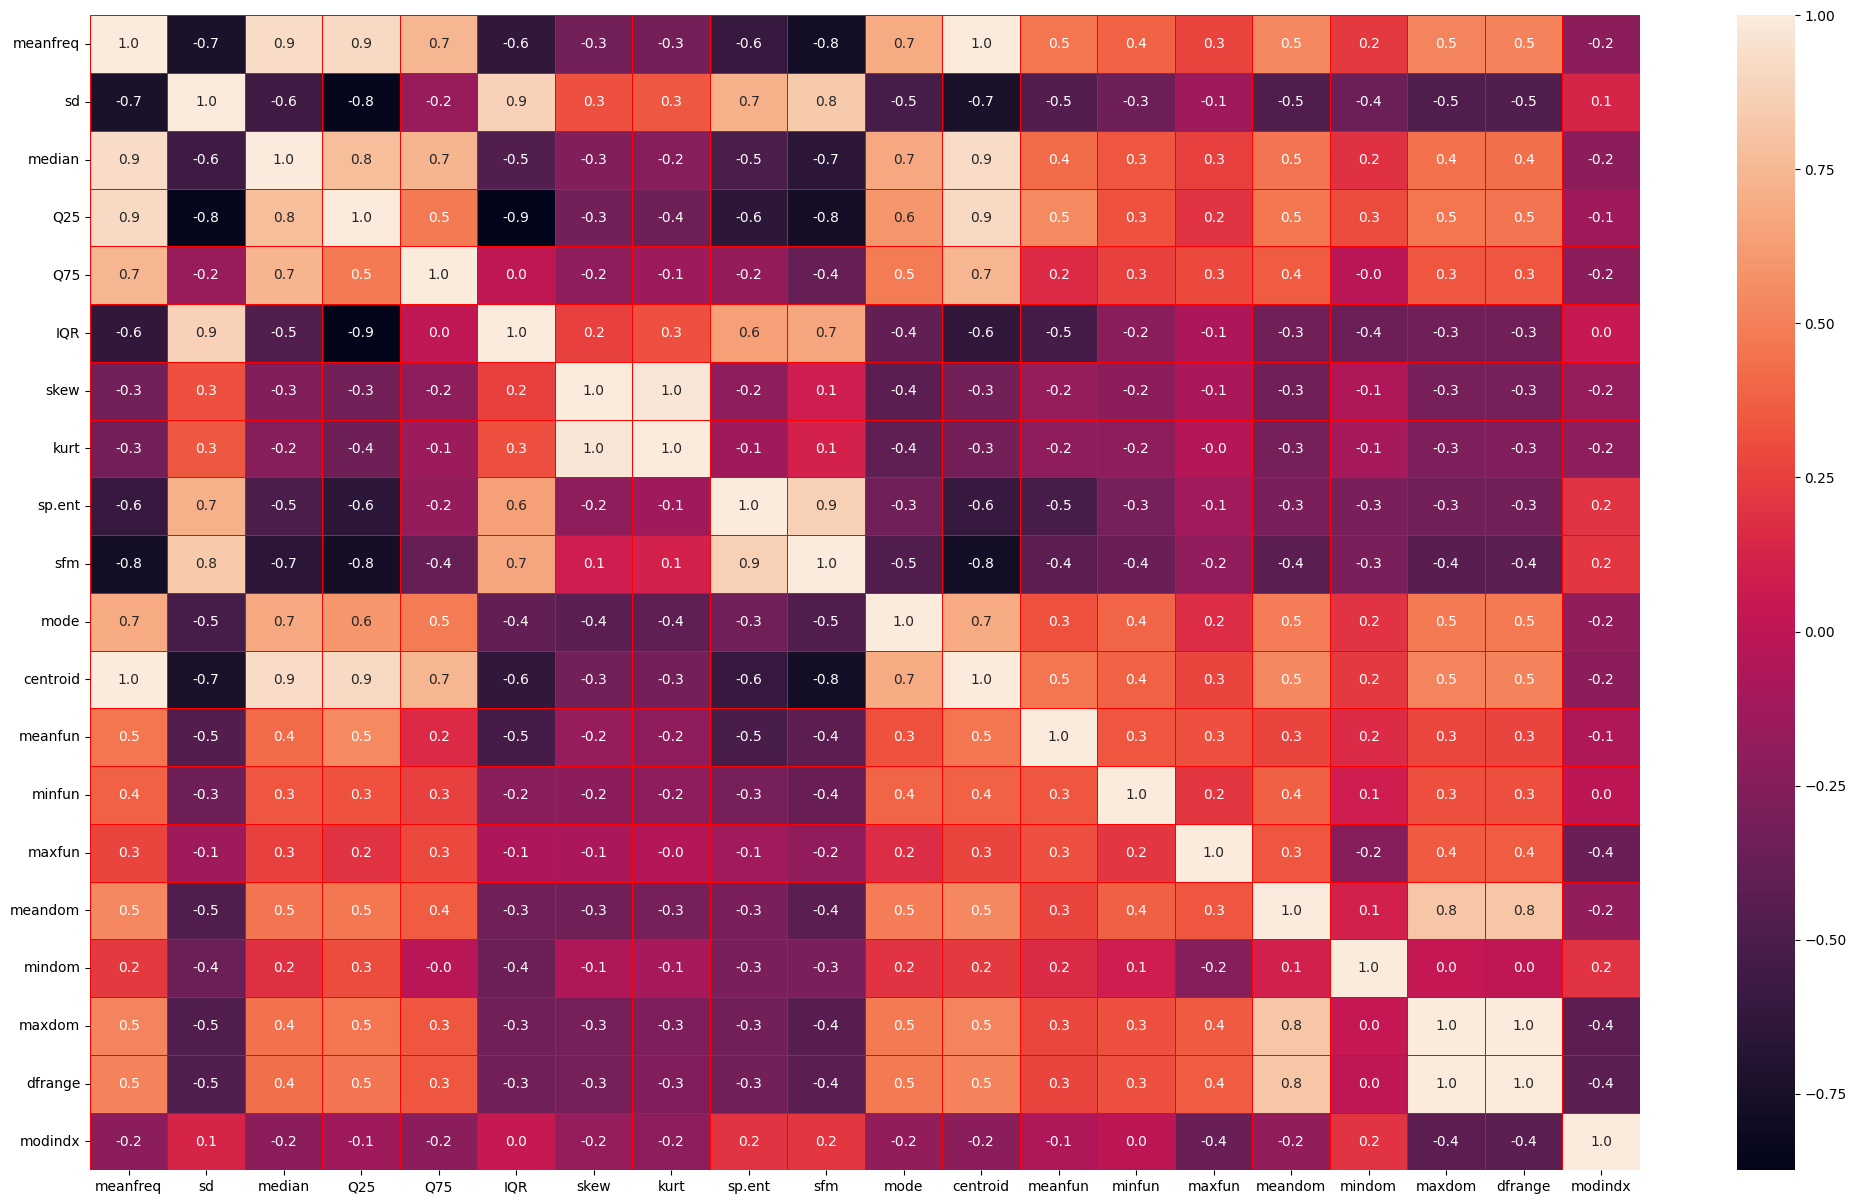

In [5]:
numeric_columns = df.select_dtypes(include=[np.number])
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(numeric_columns.corr(), annot=True, linewidths=0.5, linecolor="red", fmt='.1f', ax=ax)
plt.show()


In [6]:
#seperate features and labels
X=df.iloc[:, :-1]

X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [7]:
# to check for Nan values
df.isnull().sum()

y = []


In [8]:
# encoding male=1 and female=0
for i in range(len(df.label)):
    if df.label[i] == 'male':
        y.append(1)
    elif df.label[i] == 'female':
        y.append(0)


In [9]:
df = df.drop('label', axis=1)  # drop th ecolumn with labels
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)


In [10]:
stdSc = StandardScaler()  # preprocessing
X_train = stdSc.fit_transform(X_train)
X_test = stdSc.fit_transform(X_test)

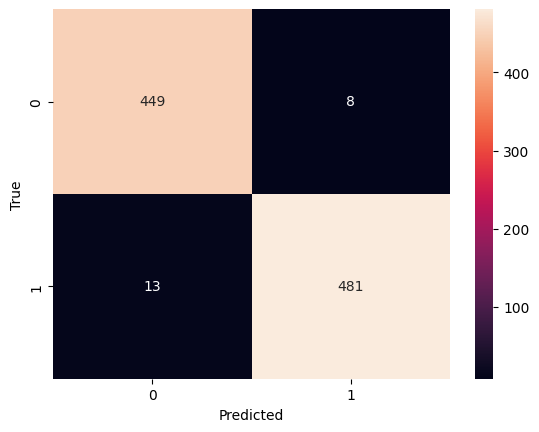

In [11]:
#neural networks trial

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30), learning_rate_init=0.001)
mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

SVM Accuracy (C=5 & kernel=rbf):
0.9863301787592008


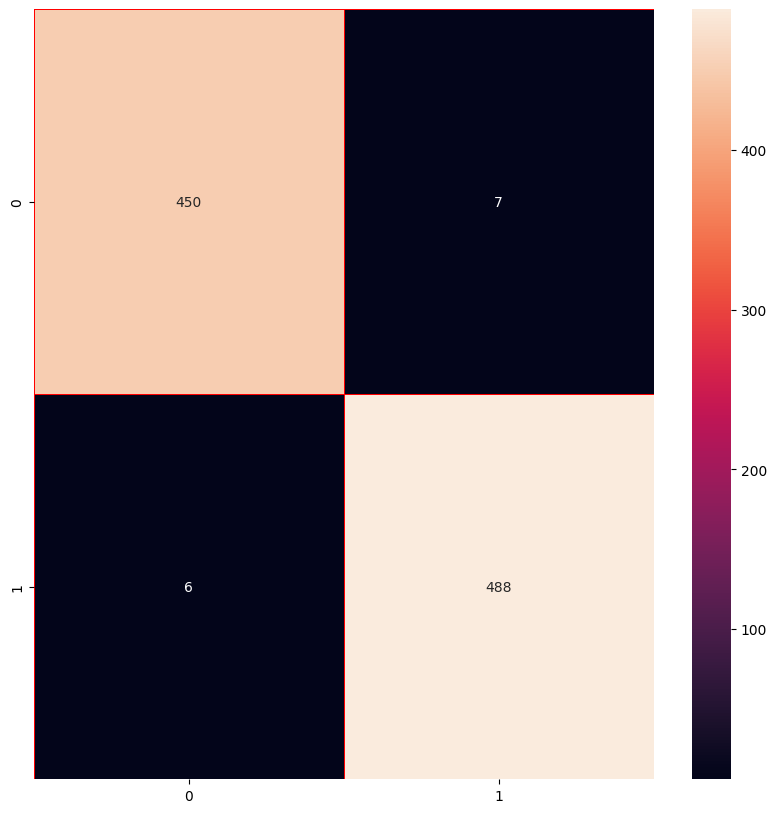

-----------------------------------------------------------
SVM Accuracy (C=5 & kernel=linear):
0.9789695057833859


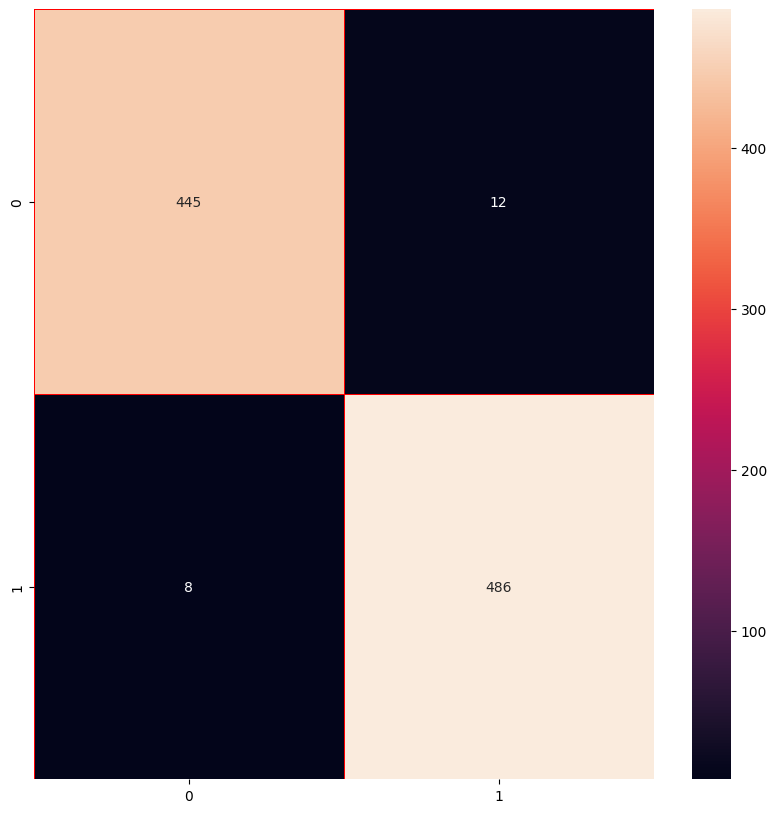

-----------------------------------------------------------
SVM Accuracy (C=5 & kernel=sigmoid):
0.7844374342797056


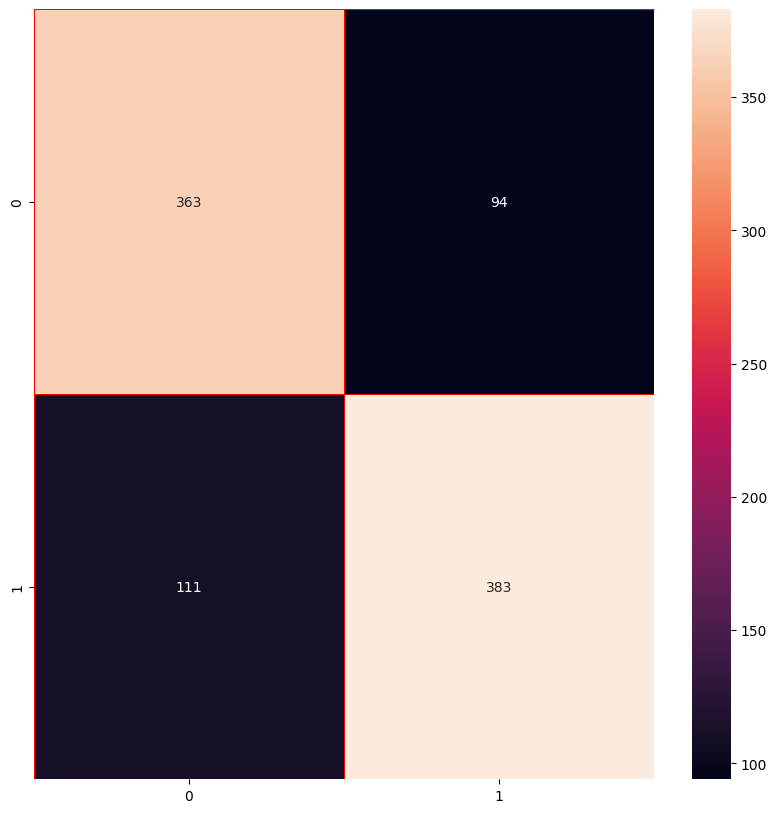

-----------------------------------------------------------
SVM Accuracy (C=5 & kernel=poly):
0.9747634069400631


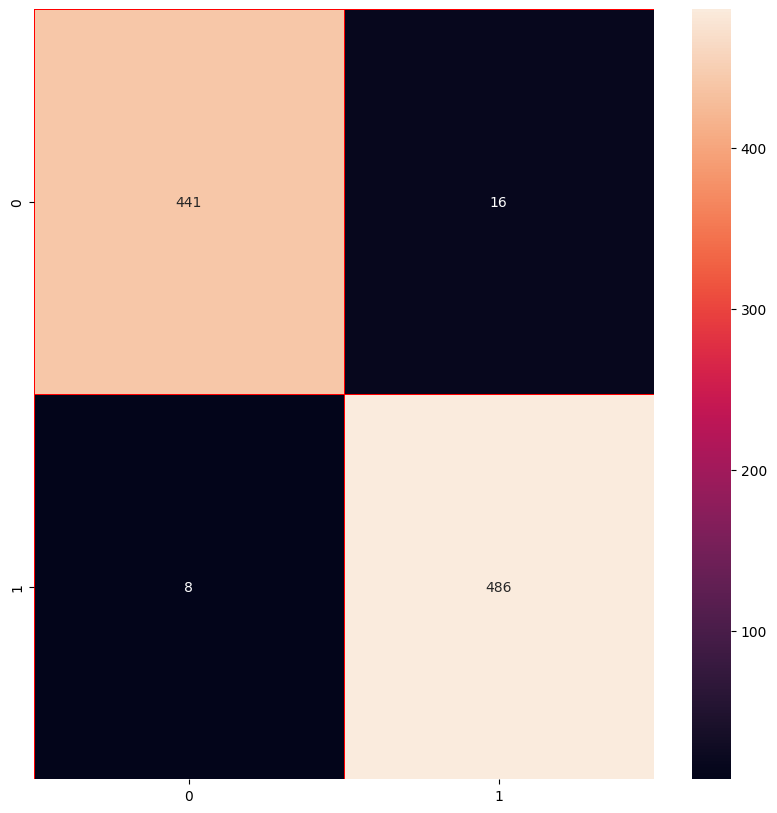

-----------------------------------------------------------
SVM Accuracy (C=15 & kernel=rbf):
0.9852786540483701


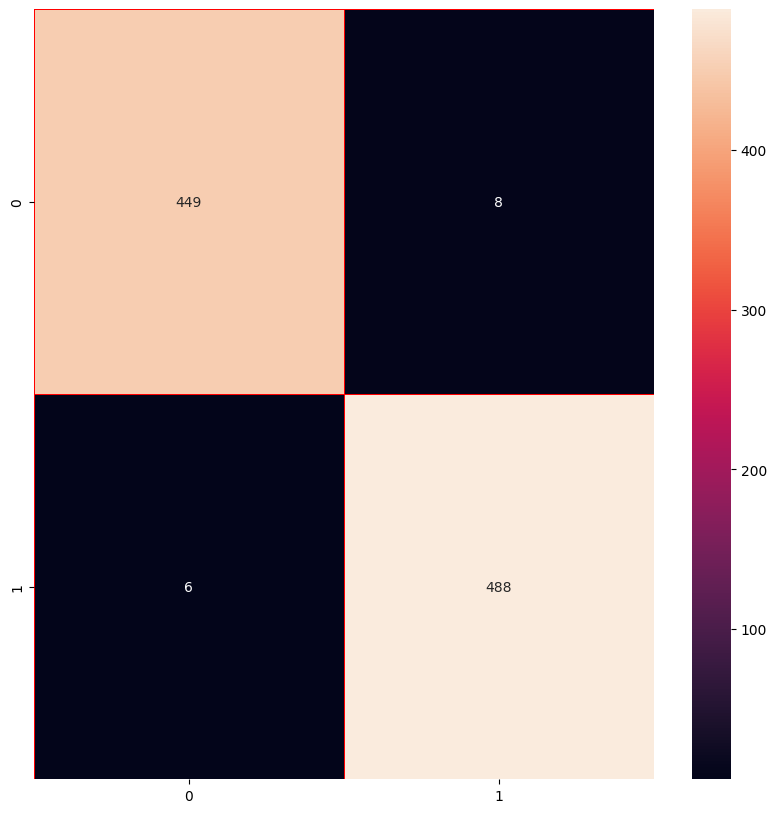

-----------------------------------------------------------
SVM Accuracy (C=15 & kernel=linear):
0.9768664563617245


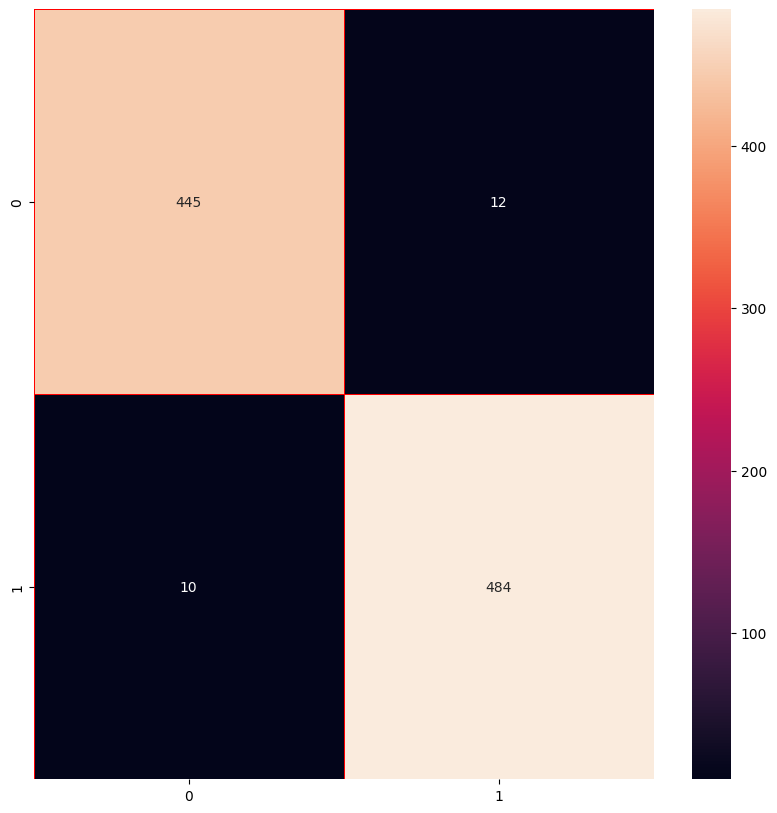

-----------------------------------------------------------
SVM Accuracy (C=15 & kernel=sigmoid):
0.7812828601472135


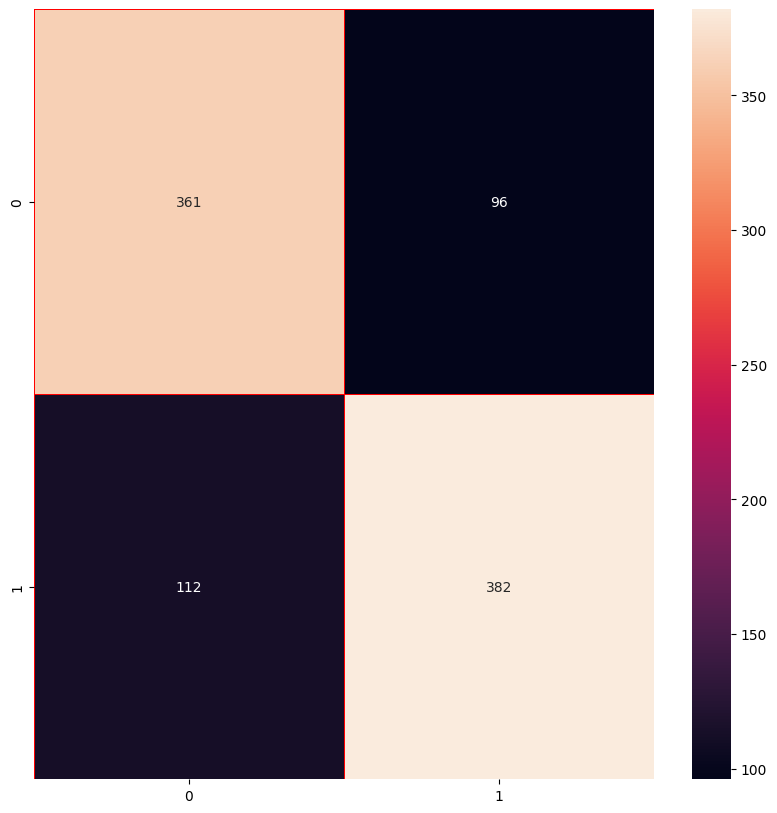

-----------------------------------------------------------
SVM Accuracy (C=15 & kernel=poly):
0.9758149316508938


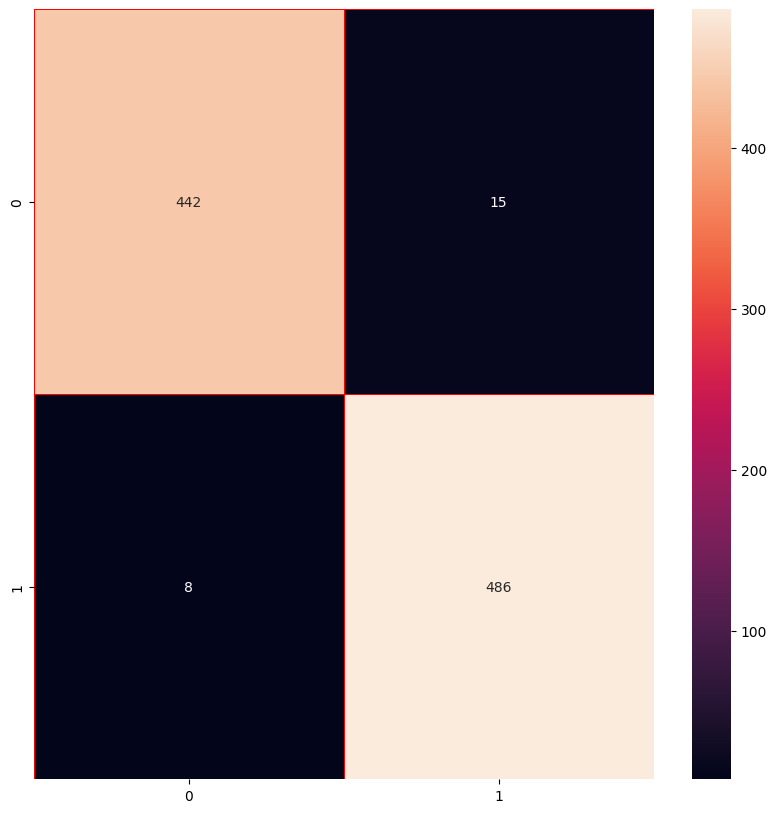

-----------------------------------------------------------
SVM Accuracy (C=0.01 & kernel=rbf):
0.9053627760252366


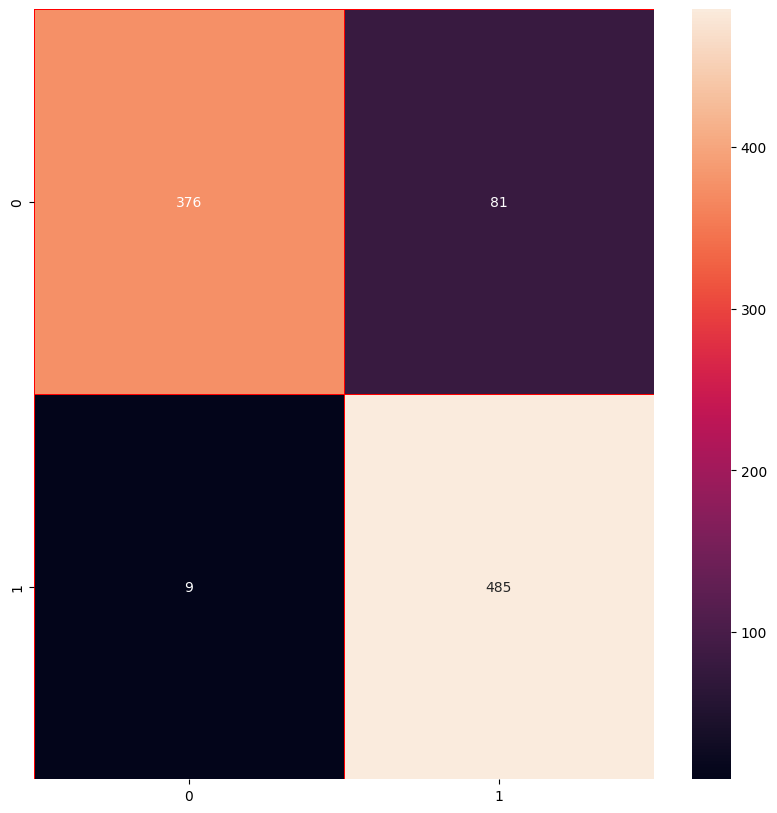

-----------------------------------------------------------
SVM Accuracy (C=0.01 & kernel=linear):
0.9726603575184016


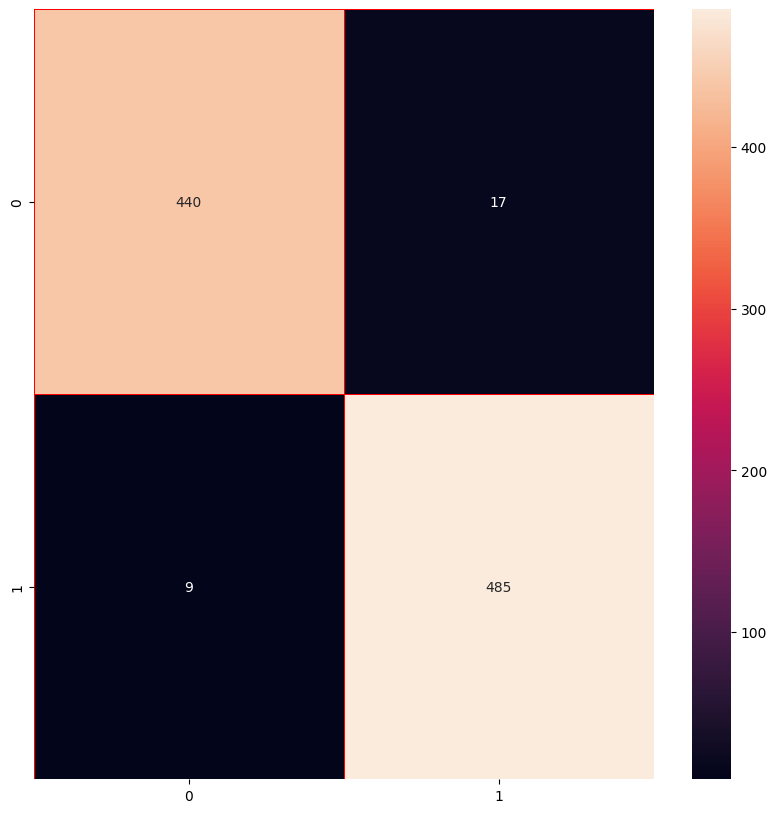

-----------------------------------------------------------
SVM Accuracy (C=0.01 & kernel=sigmoid):
0.9085173501577287


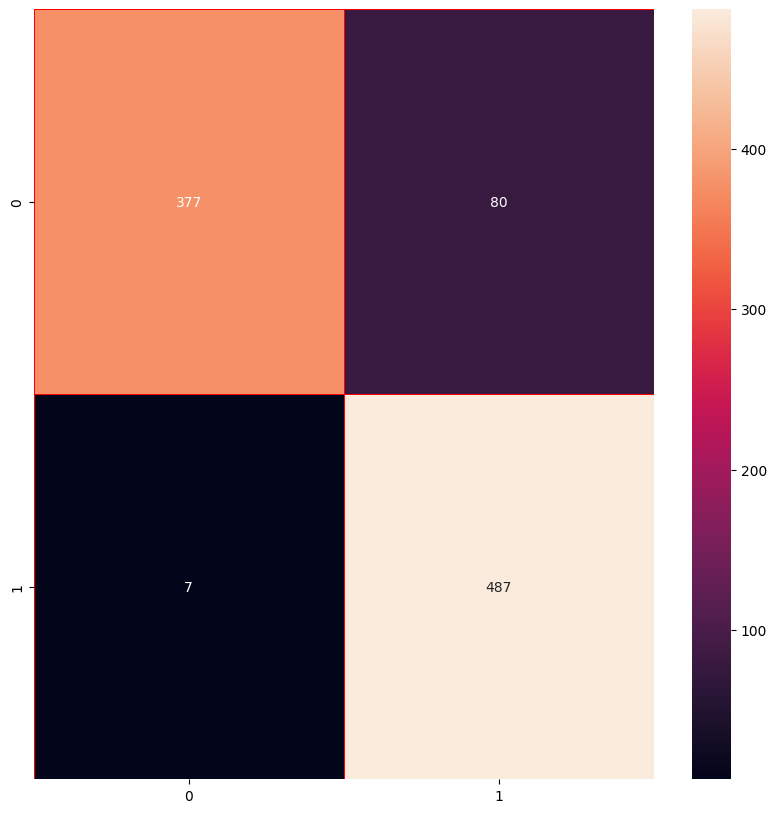

-----------------------------------------------------------
SVM Accuracy (C=0.01 & kernel=poly):
0.9516298633017876


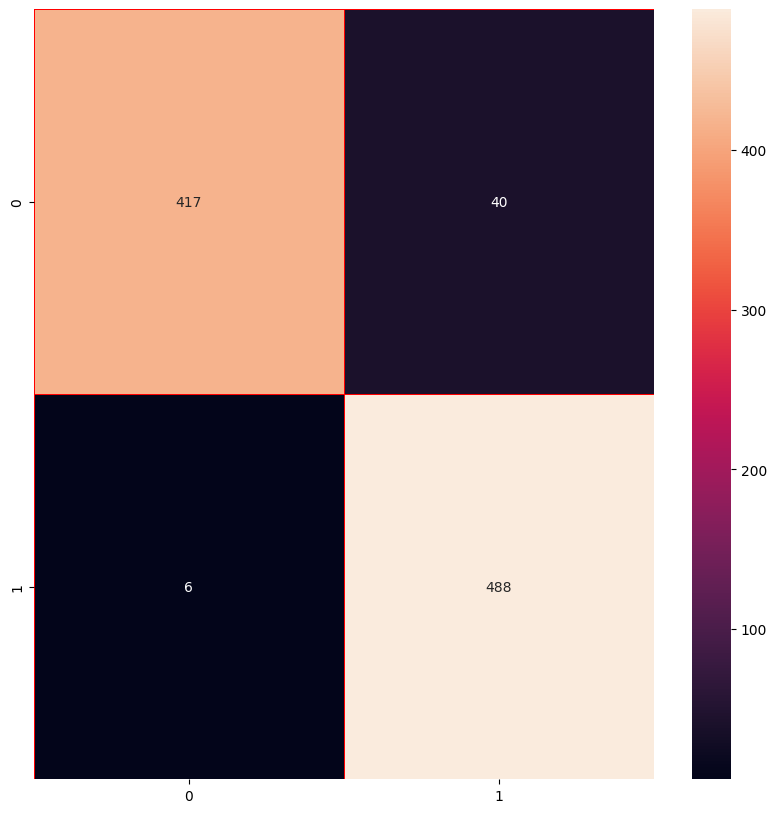

-----------------------------------------------------------
SVM Accuracy (C=0.1 & kernel=rbf):
0.9705573080967402


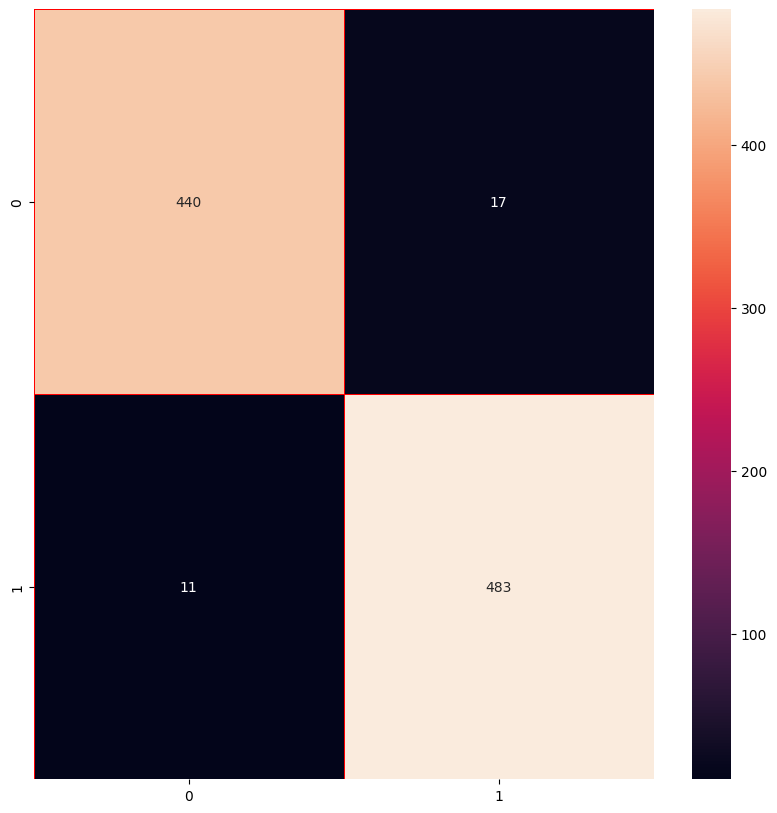

-----------------------------------------------------------
SVM Accuracy (C=0.1 & kernel=linear):
0.9758149316508938


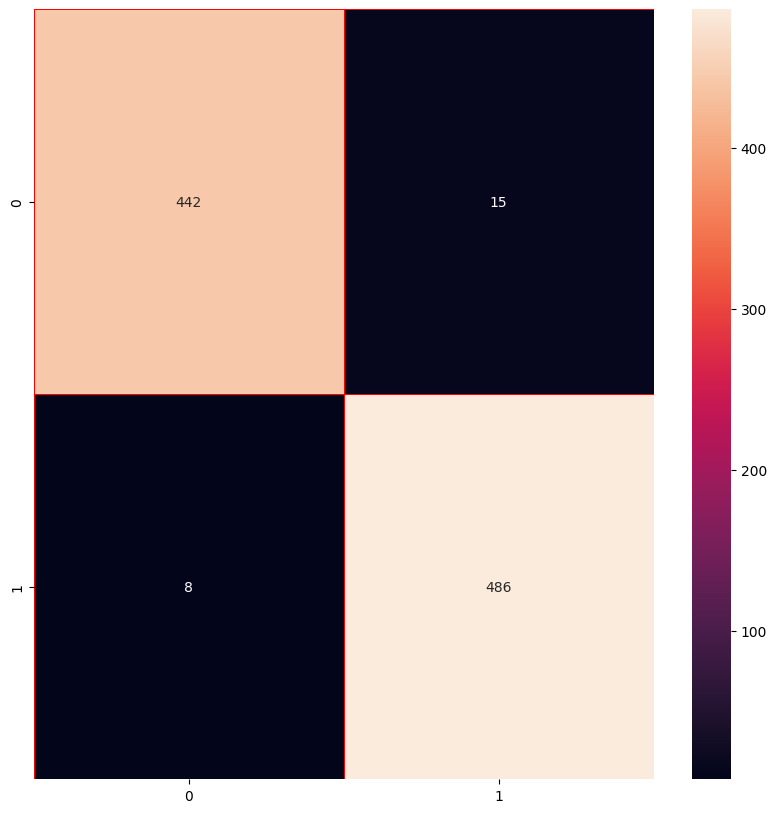

-----------------------------------------------------------
SVM Accuracy (C=0.1 & kernel=sigmoid):
0.861198738170347


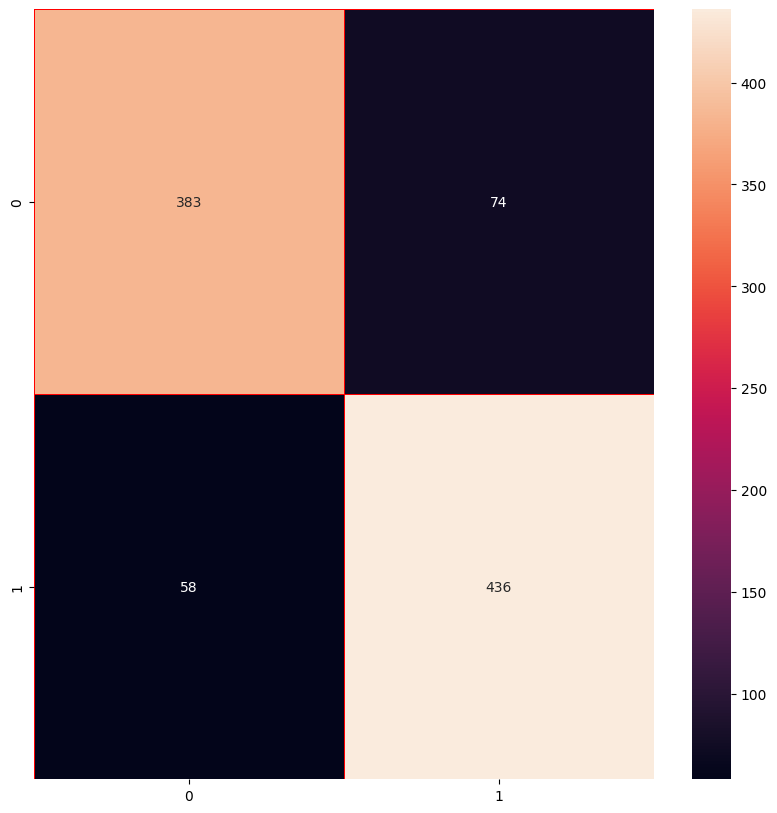

-----------------------------------------------------------
SVM Accuracy (C=0.1 & kernel=poly):
0.9390115667718192


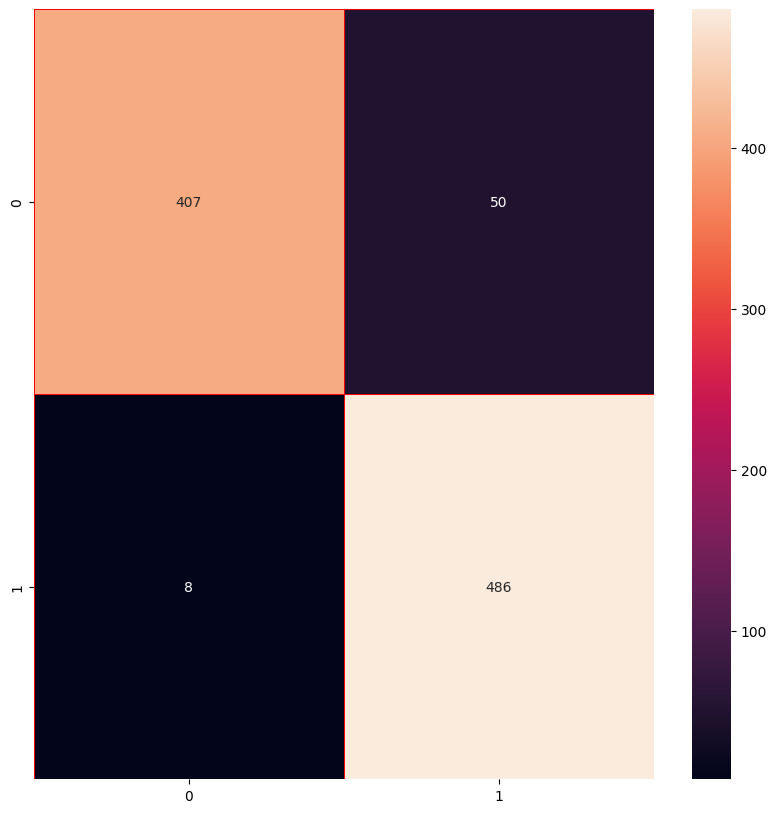

-----------------------------------------------------------
SVM Accuracy (C=1 & kernel=rbf):
0.9863301787592008


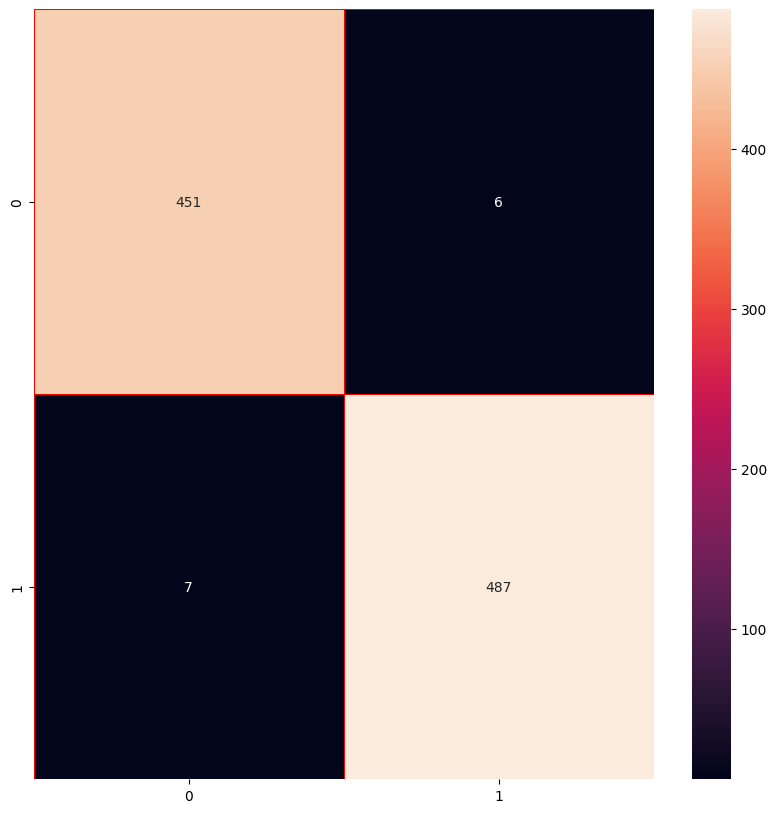

-----------------------------------------------------------
SVM Accuracy (C=1 & kernel=linear):
0.9789695057833859


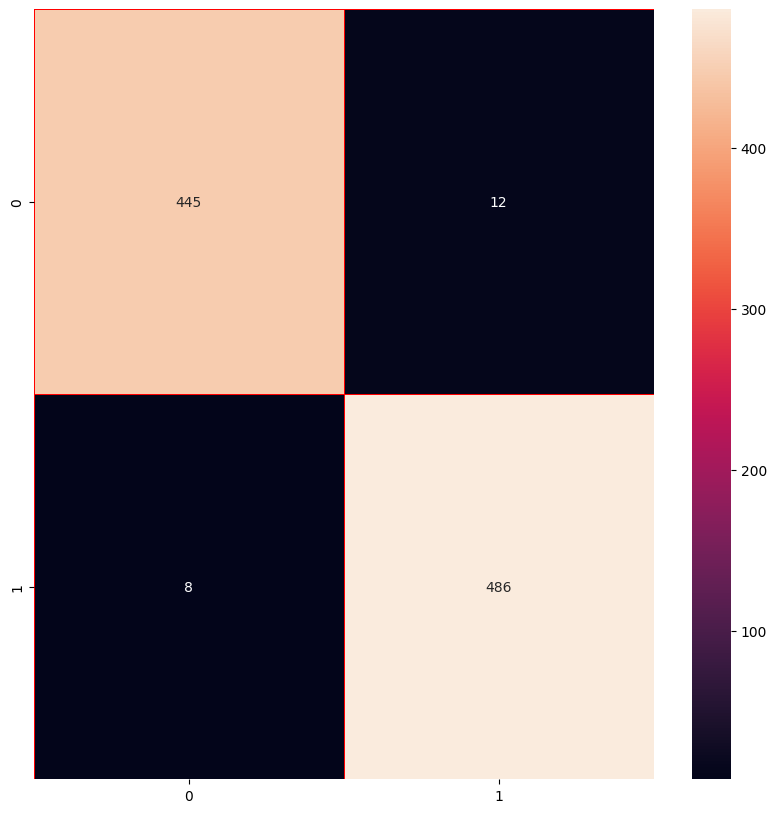

-----------------------------------------------------------
SVM Accuracy (C=1 & kernel=sigmoid):
0.7939011566771819


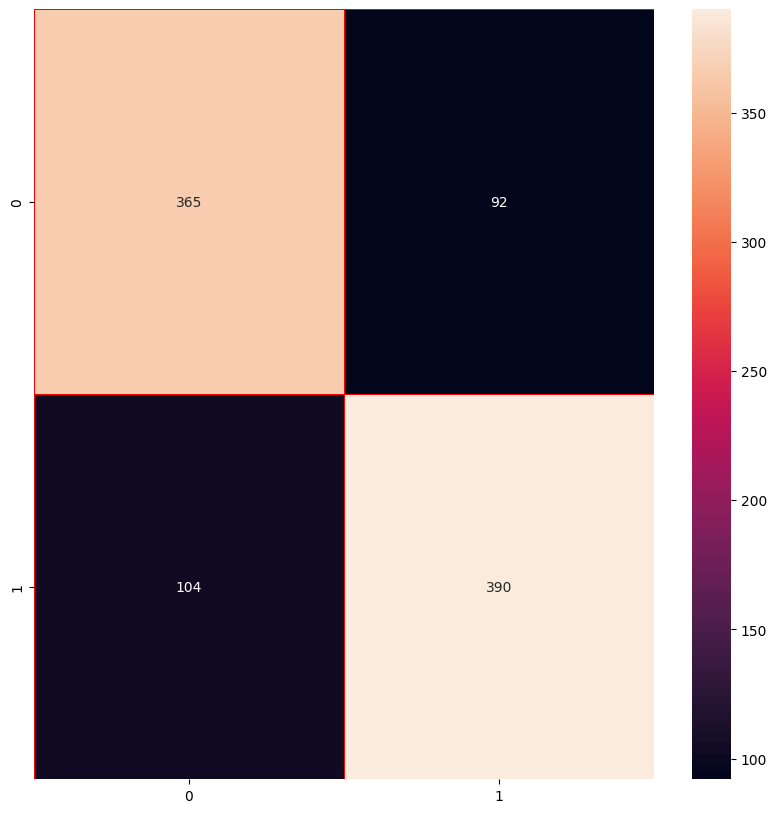

-----------------------------------------------------------
SVM Accuracy (C=1 & kernel=poly):
0.9621451104100947


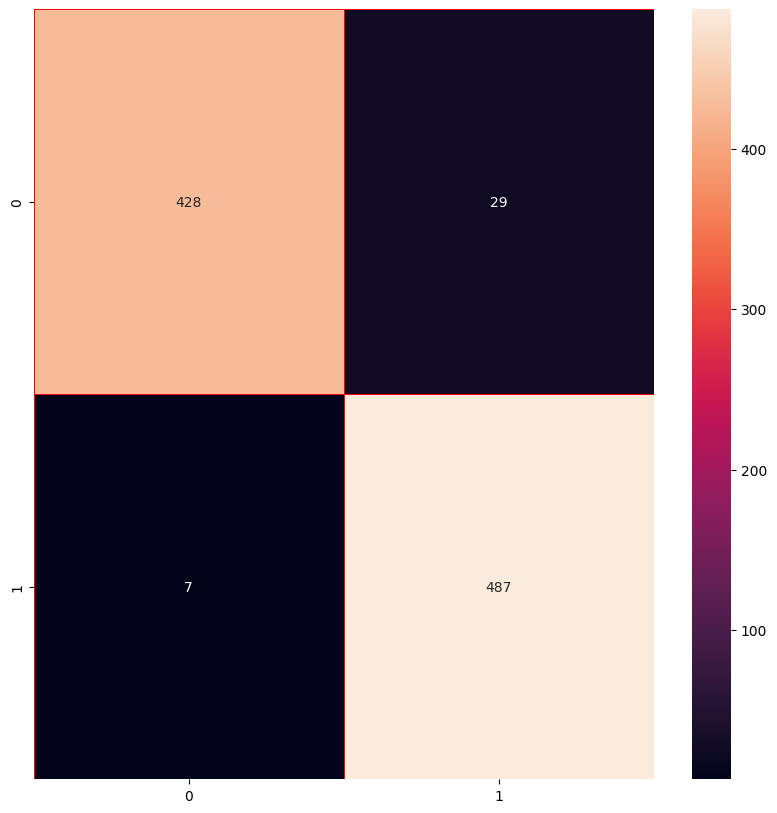

-----------------------------------------------------------
SVM Accuracy (C=10 & kernel=rbf):
0.9863301787592008


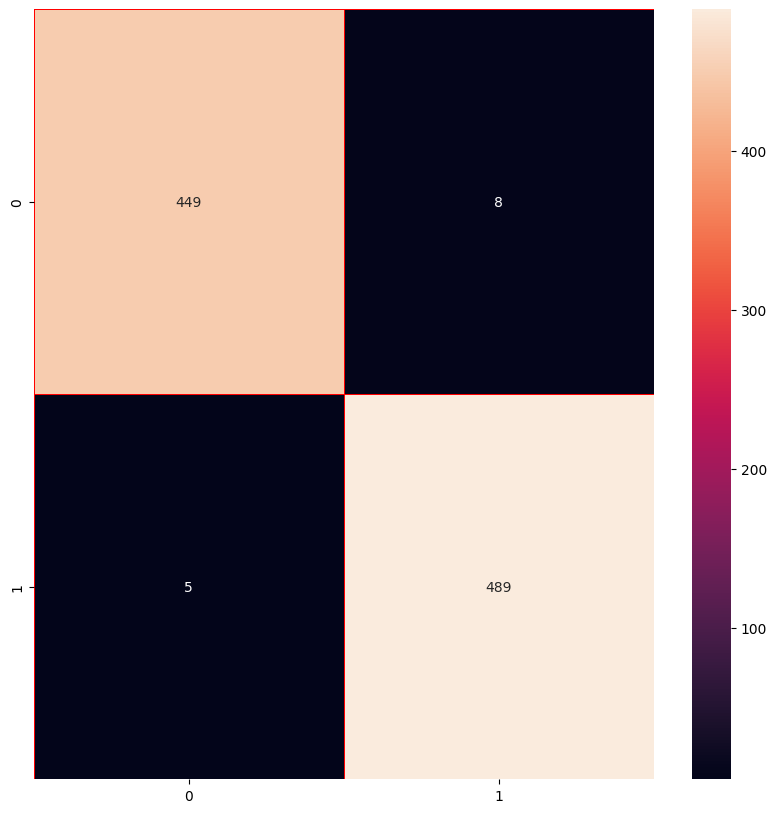

-----------------------------------------------------------
SVM Accuracy (C=10 & kernel=linear):
0.9768664563617245


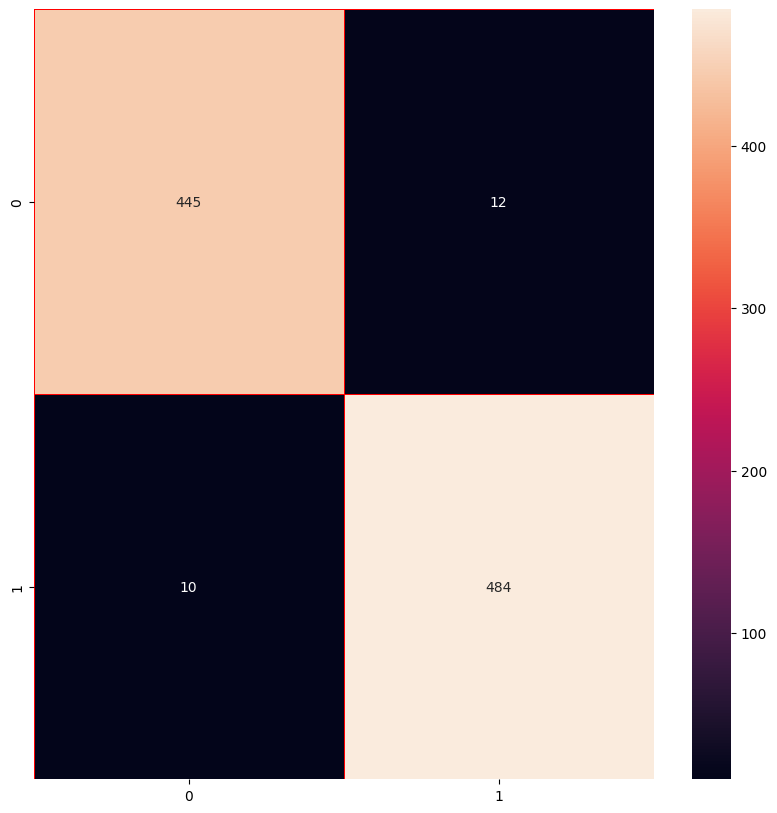

-----------------------------------------------------------
SVM Accuracy (C=10 & kernel=sigmoid):
0.7812828601472135


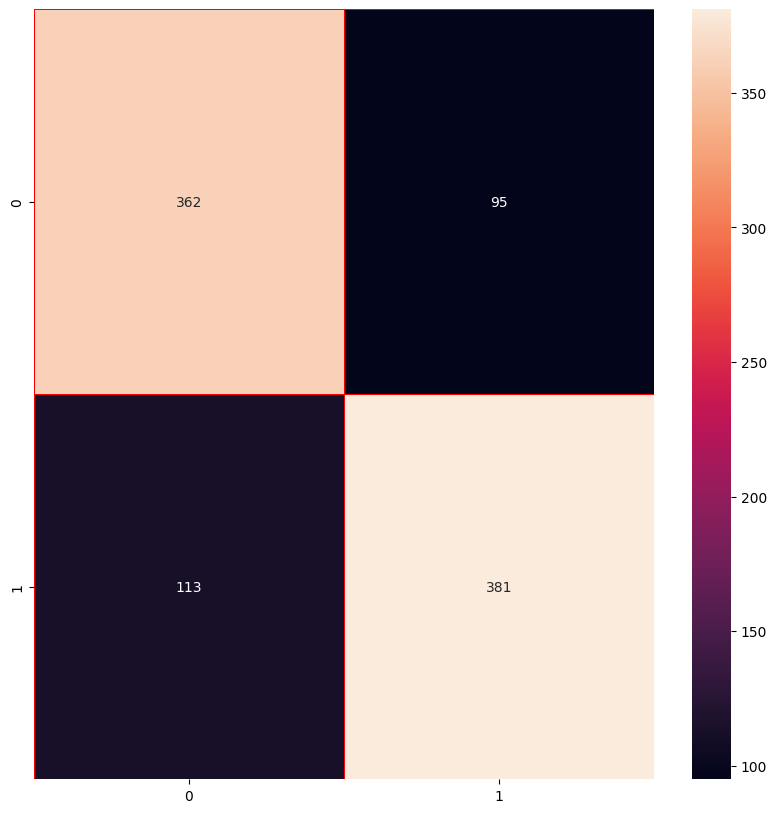

-----------------------------------------------------------
SVM Accuracy (C=10 & kernel=poly):
0.9768664563617245


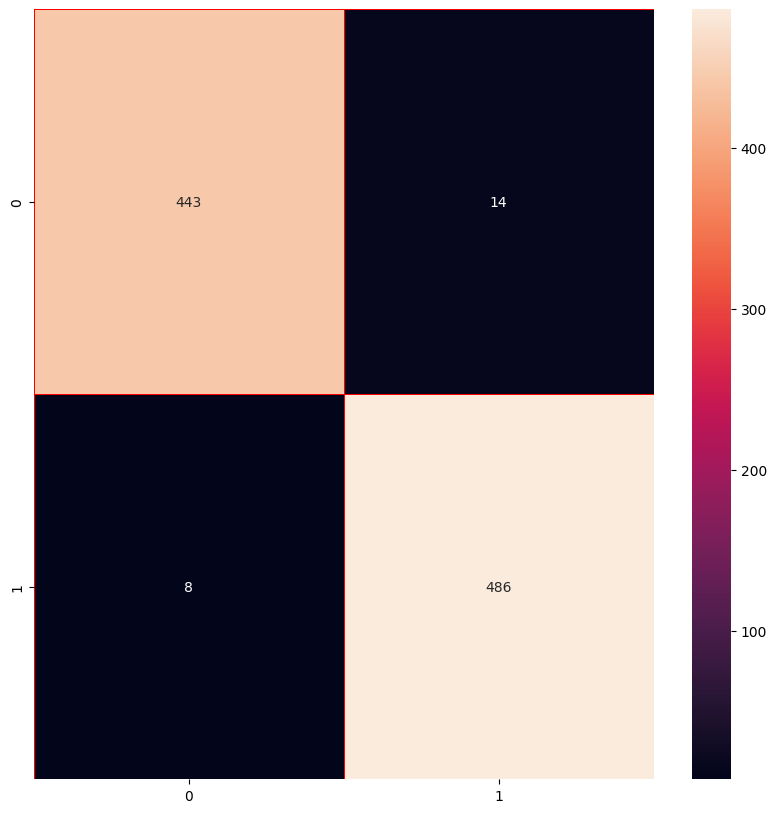

-----------------------------------------------------------
SVM Accuracy (C=100 & kernel=rbf):
0.9842271293375394


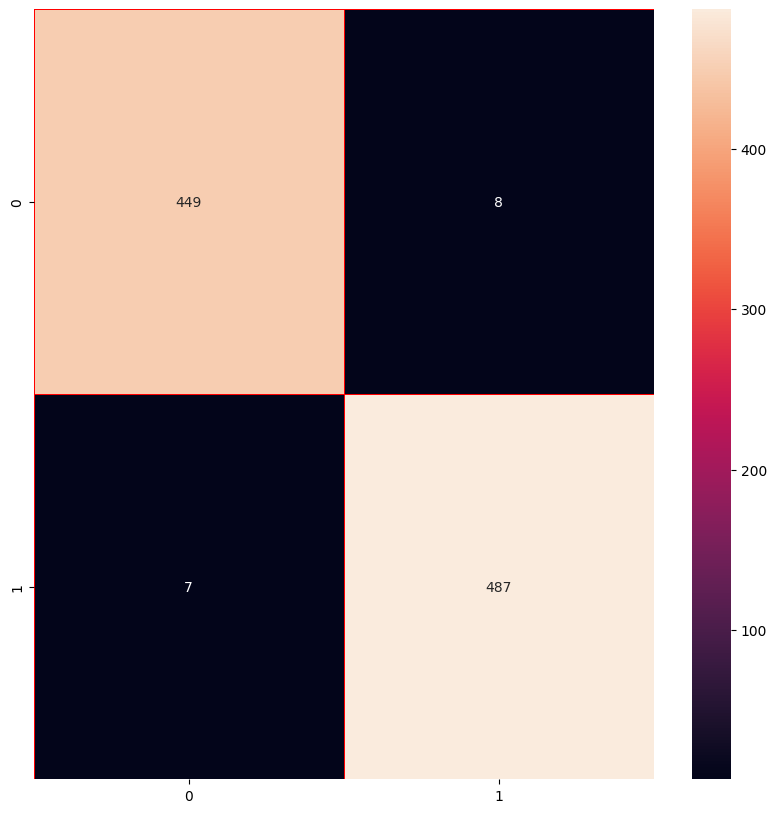

-----------------------------------------------------------
SVM Accuracy (C=100 & kernel=linear):
0.9768664563617245


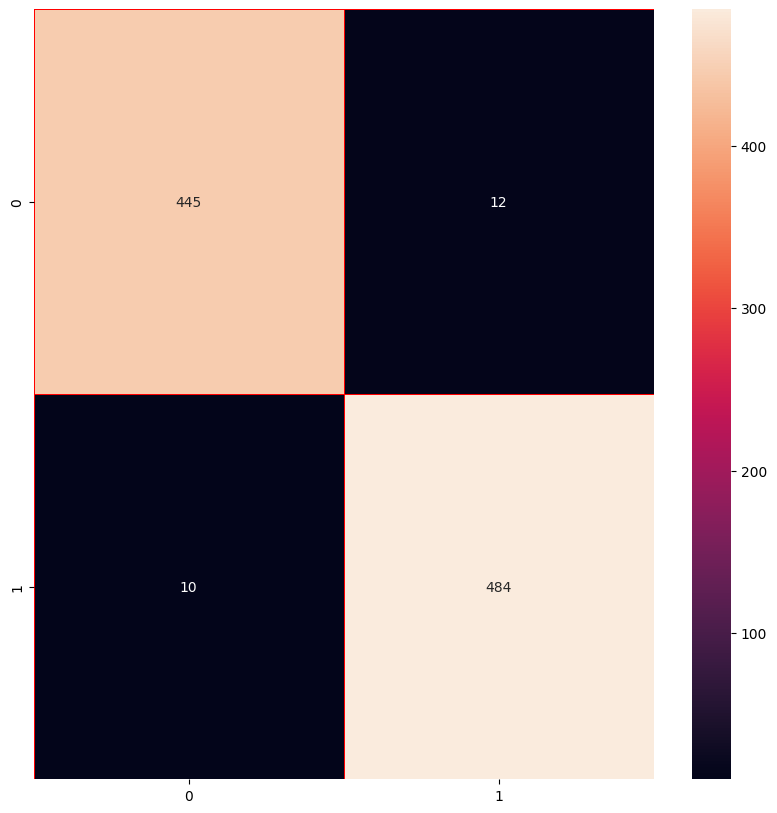

-----------------------------------------------------------
SVM Accuracy (C=100 & kernel=sigmoid):
0.7812828601472135


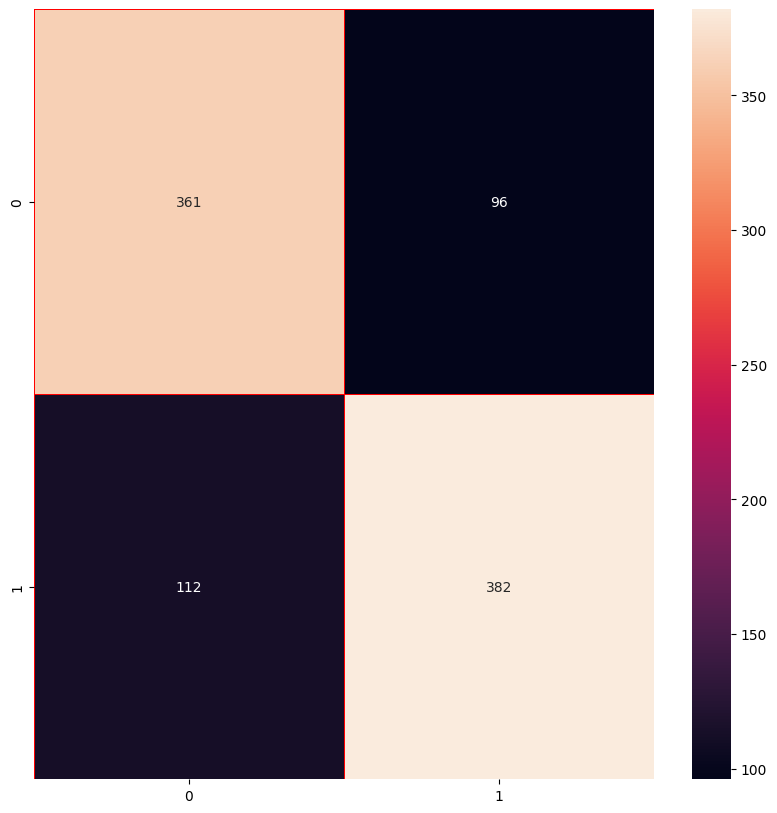

-----------------------------------------------------------
SVM Accuracy (C=100 & kernel=poly):
0.9716088328075709


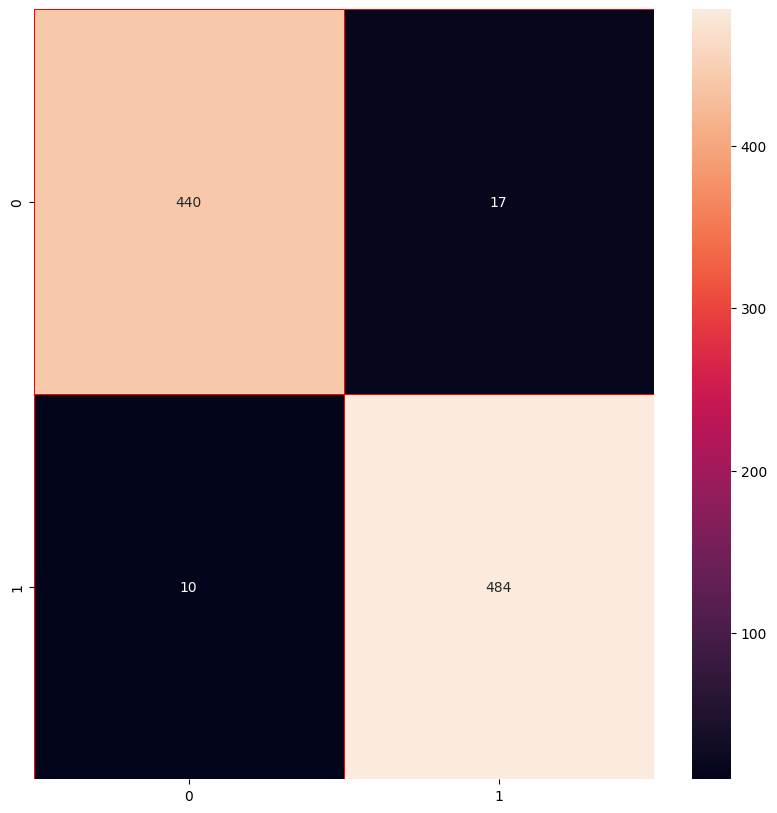

-----------------------------------------------------------
SVM Accuracy (C=1000 & kernel=rbf):
0.9831756046267087


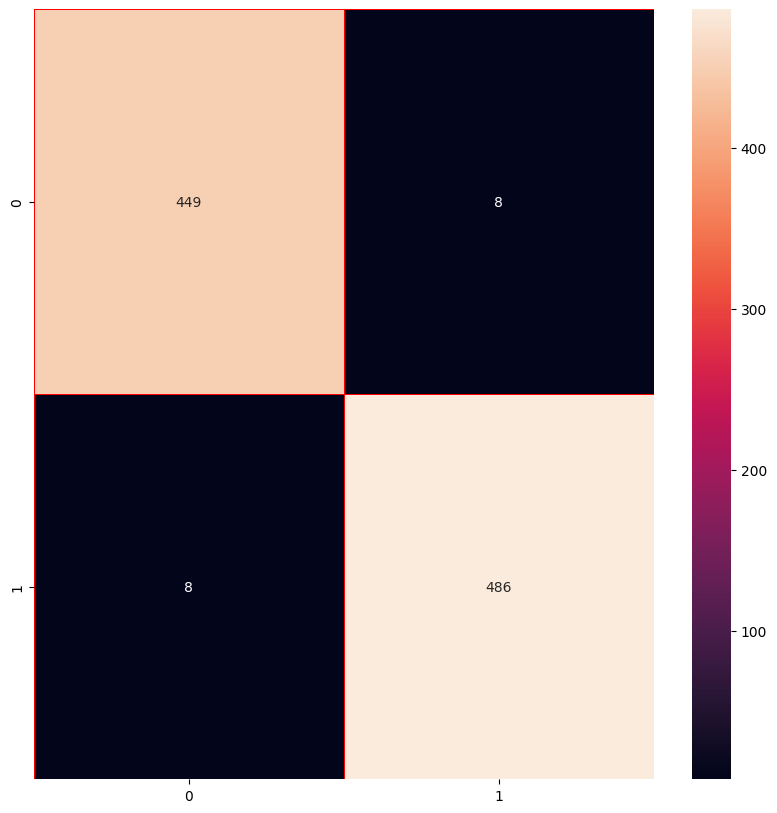

-----------------------------------------------------------
SVM Accuracy (C=1000 & kernel=linear):
0.9768664563617245


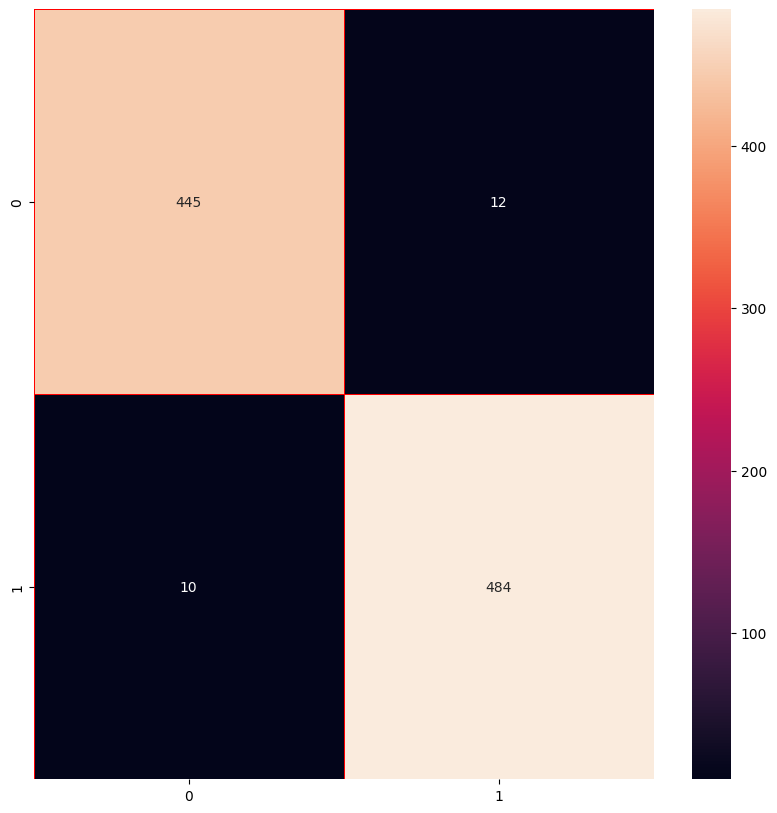

-----------------------------------------------------------
SVM Accuracy (C=1000 & kernel=sigmoid):
0.7812828601472135


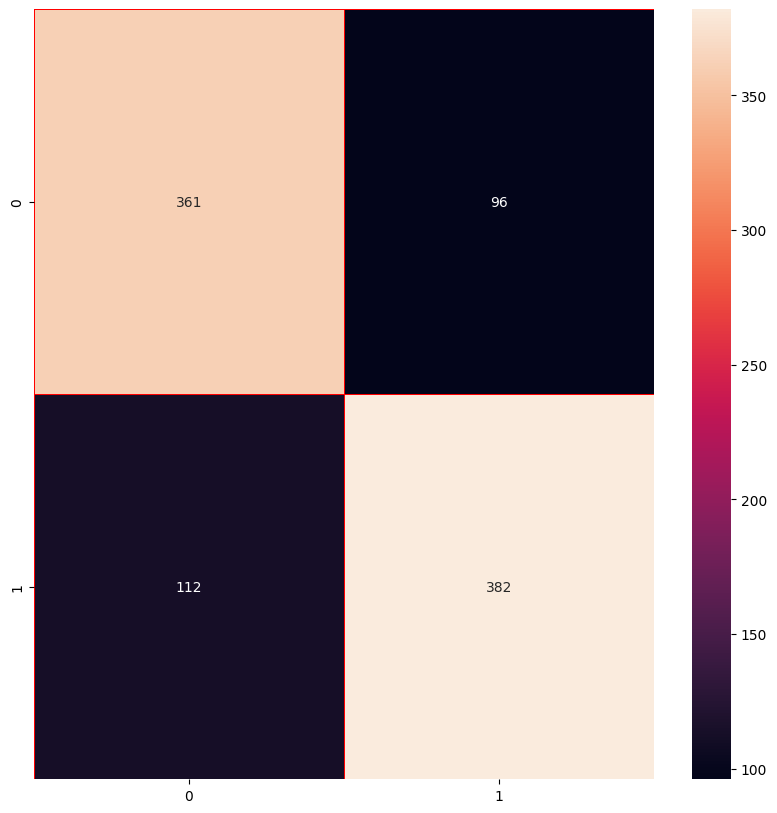

-----------------------------------------------------------
SVM Accuracy (C=1000 & kernel=poly):
0.9747634069400631


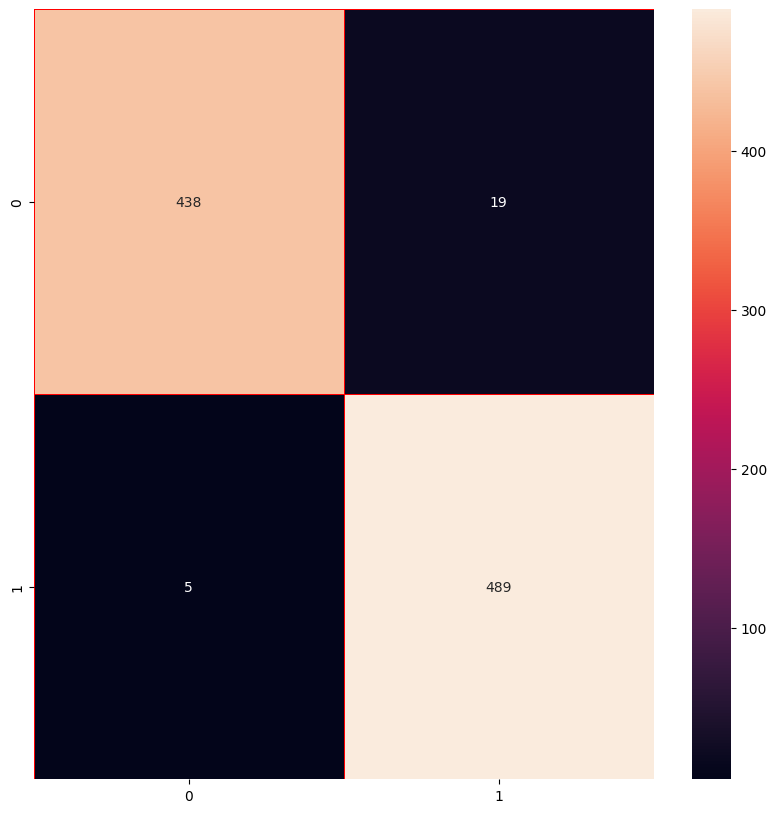

-----------------------------------------------------------


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

C = [5, 15, 0.01, 0.1, 1, 10, 100, 1000]
kernels = ['rbf', 'linear', 'sigmoid', 'poly']

for i in C:
    for k in kernels:
        clf1 = svm.SVC(C=i, kernel=k)
        clf1.fit(X_train, y_train)
        
        y_pred = clf1.predict(X_test)
        
        print("SVM Accuracy (C={} & kernel={}):".format(i, k))
        print(accuracy_score(y_pred, y_test))
        
        cm = confusion_matrix(y_test, y_pred)
        f, ax = plt.subplots(figsize=(10, 10))
        sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt='.0f', ax=ax)
        plt.show()
        plt.savefig('ConfusionMatrix_{}_{}.png'.format(i, k))
        plt.close()

        print("-----------------------------------------------------------")


In [13]:
from sklearn.metrics import  f1_score
f1_score = f1_score(y_test, y_pred)
print("F1 Score:")
print(f1_score)

F1 Score:
0.9760479041916168


In [14]:
# knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

model = KNeighborsClassifier()

k_range = list(range(1, 101))
weight_options = ['uniform', 'distance']

param_dist = dict(n_neighbors=k_range, weights=weight_options)

rand = RandomizedSearchCV(estimator=model, cv=10, param_distributions=param_dist, n_iter=10)
rand.fit(X_train, y_train)

print(rand.best_score_)
print(rand.best_params_)
print("KNN Accuracy (k={}): {}".format(rand.best_params_['n_neighbors'], rand.best_score_))

C:\Users\omarm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\omarm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.305

0.9715930862989687
{'weights': 'uniform', 'n_neighbors': 7}
KNN Accuracy (k=7): 0.9715930862989687


In [15]:
import joblib
import numpy as np

def predict_class(feature_inputs):
    model = joblib.load(r"D:\\University\\Gradution Project\\neural_network_model_checkpoint.joblib")
    user_input = np.array(feature_inputs).reshape(1, -1)
    prediction = model.predict(user_input)
    return prediction[0]

In [16]:
st.title('Neural Network Deployment with Streamlit')

feature_inputs = []
for i in range(20):
    feature_inputs.append(st.number_input(f'Enter Feature {i+1}:'))

user_input = np.array(feature_inputs).reshape(1, -1)

if st.button('Predict'):
    model = joblib.load(r"D:\\University\\Gradution Project\\neural_network_model_checkpoint.joblib")
    prediction = model.predict(user_input)
    st.success(f'The predicted class is: {prediction[0]}')

if st.checkbox('Show Model Information'):
    model = joblib.load(r"D:\\University\\Gradution Project\\neural_network_model_checkpoint.joblib")
    predictions = model.predict(X_test)    
    st.subheader('Confusion Matrix:')
    st.write(confusion_matrix(y_test, predictions))
    st.subheader('Classification Report:')
    st.write(classification_report(y_test, predictions))

2024-03-08 16:33:14.731 
  command:

    streamlit run C:\Users\omarm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
